# Multiple Linear Regression

### Import the packages

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Read the data set 

In [20]:
df = pd.read_csv(r'\Users\Sreenivasulu\Downloads\50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [27]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


### Check for null and duplicated values

In [22]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [25]:
df.duplicated().sum()

0

### E.D.A

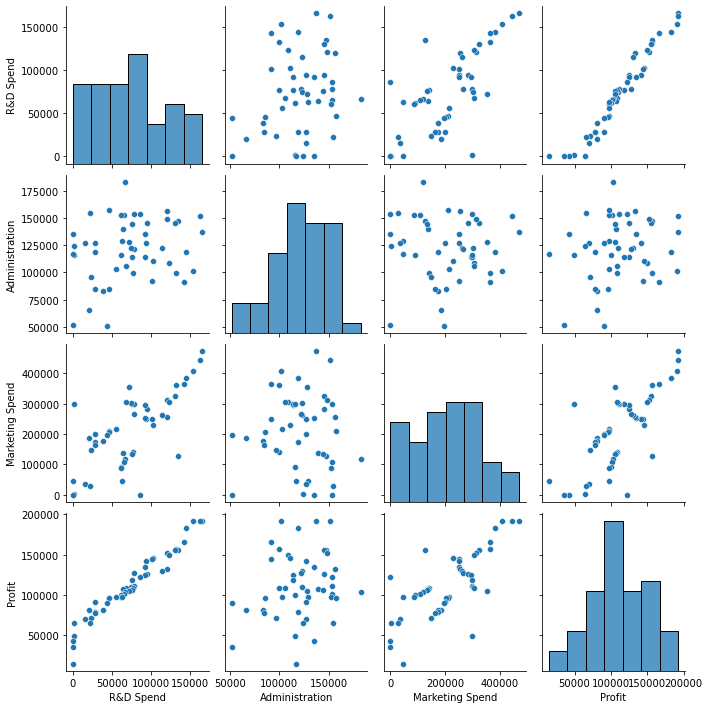

In [34]:
sns.pairplot(df)

<AxesSubplot:xlabel='State', ylabel='Profit'>

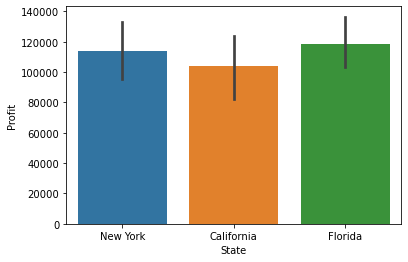

In [60]:
sns.barplot(df['State'],df['Profit'])

### Encoding Categorical data

In [8]:
X = df.iloc[:,:-1].values                                # columns except profit column
Y = df.iloc[:,-1].values                                 # profit column

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(),[3])],remainder = 'passthrough')     
X = np.array(ct.fit_transform(X))                                  # applying Onehotencoding to state column

### Splitting the dataset

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2, random_state=42)

In [11]:
X_test.shape

(10, 6)

### Import the model and fit with data

In [12]:
from sklearn.linear_model import LinearRegression

reg =  LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [13]:
reg.coef_                          # we get 'six' co-efficients of equation

array([-3.15260255e+02,  6.23532751e+02, -3.08272495e+02,  8.05630064e-01,
       -6.87878823e-02,  2.98554429e-02])

In [14]:
reg.intercept_                      # the intercept of equation

54343.29984942173

### Scores for dataset

In [77]:
print('The model score for training data :',reg.score(X_train,y_train))

The model score for training data : 0.9537019995248526


In [78]:
print('The model score for testing data :',reg.score(X_test,y_test))

The model score for testing data : 0.8987266414319495


### Result visualisation

##### visualisation with train and test data

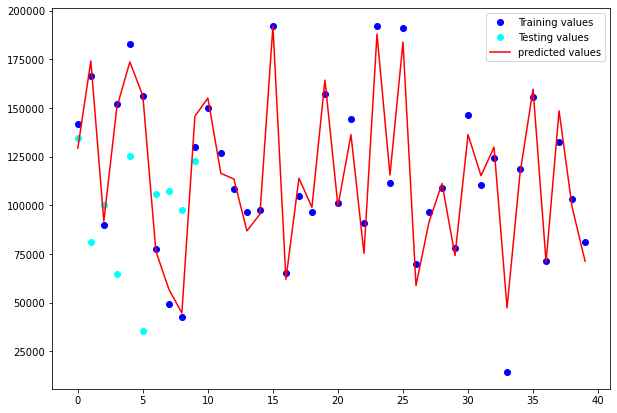

In [79]:
plt.figure(figsize=(10,7))
plt.plot(y_train,'o',color='blue', label ='Training values')
plt.plot(y_test,'o',color='cyan', label ='Testing values')
plt.plot(reg.predict(X_train),color = 'red',label = 'predicted values')
plt.legend()

##### visualisation with entire data

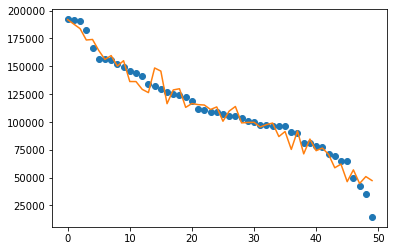

In [18]:
plt.plot(Y,'o')
plt.plot(reg.predict(X))

### Dataframe with actual and predicted values

In [19]:
test_df = pd.DataFrame()
test_df['Actual values'] = y_test
test_df['Predicted values'] = reg.predict(X_test)
test_df

,Actual values,Predicted values
0,134307.35,126362.879083
1,81005.76,84608.453836
2,99937.59,99677.494252
3,64926.08,46357.460686
4,125370.37,128750.482885
5,35673.41,50912.417419
6,105733.54,109741.350327
7,107404.34,100643.242816
8,97427.84,97599.275746
9,122776.86,113097.425244
